In [1]:
%cd /app/dataset
#important include the directory to the cloned folder

C:\Users\Binura\Desktop\Project_11_1_2022\House_Rent_Prediction\dataset


In [2]:
import pandas as pd
train_df = pd.read_csv("train_reg.csv")
X_train=pd.read_csv("Xtrain_classify.csv")
Y_train=pd.read_csv("Ytrain_classify.csv")
full_df = pd.read_csv("new_house.csv")

In [3]:
%cd /app/dataset
#important include the directory to the cloned folder

C:\Users\Binura\Desktop\Project_11_1_2022\House_Rent_Prediction


In [4]:
import cv2
import face_recognition

def take_picture():
    print("Scanning face.....")
    cap = cv2.VideoCapture(0)
    ret,frame = cap.read()
    cv2.imwrite('Picture.jpg',frame)
    cv2.destroyAllWindows()
    cap.release()
    print("Face scan complete")

def analyze_user():
    print("Analyzing face....")
    baseimg = face_recognition.load_image_file("static/img/binura.jpeg")
    baseimg = cv2.cvtColor(baseimg,cv2.COLOR_BGR2RGB)
    
    myface = face_recognition.face_locations(baseimg)[0]
    encodemyface = face_recognition.face_encodings(baseimg)[0]
    #cv2.rectangle(baseimg,(myface[3],myface[0]),myface[1],myface[2],(255,0,255), 2)
    
    sampleimg = face_recognition.load_image_file("static/img/Picture.jpg")
    sampleimg = cv2.cvtColor(sampleimg,cv2.COLOR_BGR2RGB)
        

    try:
        samplefacetest = face_recognition.face_locations(sampleimg)[0]
        encodesamplefacetest = face_recognition.face_encodings(sampleimg)[0]
    except:
        print("Authentication failed")
        sys.exit()
        
    result = face_recognition.compare_faces([encodemyface],encodesamplefacetest)
    resultstring = str(result)
    
    return resultstring

__main__
 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5200
Press CTRL+C to quit
127.0.0.1 - - [02/Nov/2022 11:21:04] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [02/Nov/2022 11:21:04] "GET /lib/easing/easing.min.js HTTP/1.1" 404 -
127.0.0.1 - - [02/Nov/2022 11:21:04] "GET /lib/owlcarousel/owl.carousel.min.js HTTP/1.1" 404 -
127.0.0.1 - - [02/Nov/2022 11:21:04] "GET /mail/jqBootstrapValidation.min.js HTTP/1.1" 404 -
127.0.0.1 - - [02/Nov/2022 11:21:04] "GET /mail/contact.js HTTP/1.1" 404 -
127.0.0.1 - - [02/Nov/2022 11:21:05] "GET /static/img/modernh3.jpg HTTP/1.1" 304 -
127.0.0.1 - - [02/Nov/2022 11:21:05] "GET /static/img/modernh1.jpg HTTP/1.1" 304 -
127.0.0.1 - - [02/Nov/2022 11:21:05] "GET /static/img/clas.jpg HTTP/1.1" 304 -
127.0.0.1 - - [02/Nov/2022 11:21:05] "GET /static/lib/animate/animate.min.css HTTP/1.1" 304 -
127.0.0.1 - - [02/Nov/2022 11:21:05] "GET /static/img/reg.jpg HTTP/1.1" 304 -
127.0.0.1 - - [02/Nov/2022 11:21:05] "GET /static/js/main.js HTTP/1.1" 304 -
127.0.0.1 - - [02/Nov/2022 11:21:05] "GET 

Analyzing face....


127.0.0.1 - - [02/Nov/2022 11:21:57] "POST /login_validation HTTP/1.1" 302 -
127.0.0.1 - - [02/Nov/2022 11:21:57] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [02/Nov/2022 11:21:57] "GET /static/lib/animate/animate.min.css HTTP/1.1" 304 -
127.0.0.1 - - [02/Nov/2022 11:21:57] "GET /lib/owlcarousel/owl.carousel.min.js HTTP/1.1" 404 -
127.0.0.1 - - [02/Nov/2022 11:21:57] "GET /static/lib/owlcarousel/assets/owl.carousel.min.css HTTP/1.1" 304 -
127.0.0.1 - - [02/Nov/2022 11:21:57] "GET /lib/easing/easing.min.js HTTP/1.1" 404 -
127.0.0.1 - - [02/Nov/2022 11:21:57] "GET /mail/jqBootstrapValidation.min.js HTTP/1.1" 404 -
127.0.0.1 - - [02/Nov/2022 11:21:57] "GET /mail/contact.js HTTP/1.1" 404 -
127.0.0.1 - - [02/Nov/2022 11:21:57] "GET /static/css/style.css HTTP/1.1" 304 -
127.0.0.1 - - [02/Nov/2022 11:21:57] "GET /static/js/main.js HTTP/1.1" 304 -
127.0.0.1 - - [02/Nov/2022 11:21:57] "GET /static/img/modernh1.jpg HTTP/1.1" 304 -
127.0.0.1 - - [02/Nov/2022 11:21:57] "GET /static/img/modernh3.jpg HTTP/

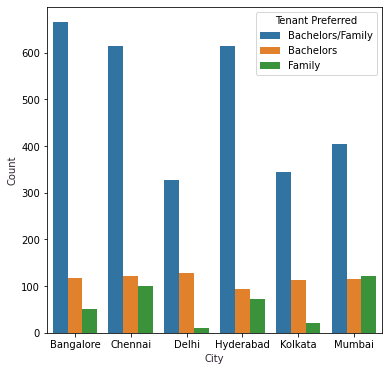

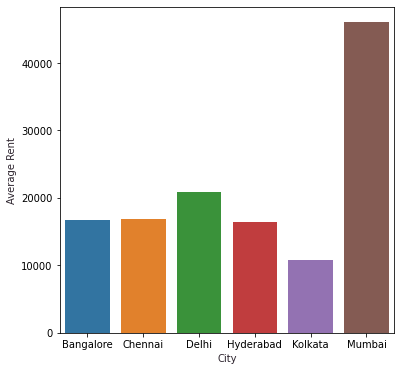

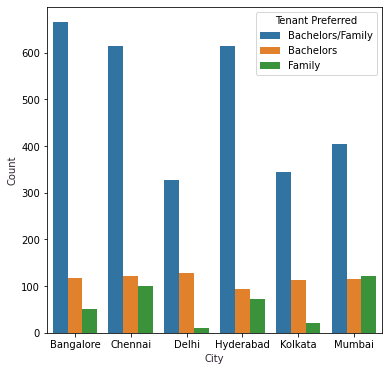

In [5]:
import numpy as np
from io import BytesIO
from flask import Flask, request, jsonify, render_template,send_file,Response,redirect,session
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from flask_session import Session

app = Flask(__name__)
app.config["SESSION_PERMANENT"] = False

app.config["SESSION_TYPE"] = "filesystem"
Session(app)

model = pickle.load(open('model/update_reg3.0.pkl', 'rb'))

#Login
@app.route('/login_validation',methods=['POST','GET'])
def login_validation():
    
    #take_picture()
    result = analyze_user()
    
    if result == "[True]":
        
        session["name"] = "admin_user"
        
        return redirect("/")

    else:
        return render_template('login.html')

    return 0

@app.route("/logout")
def logout():
    session["name"] = None
    return redirect("/")

@app.route('/login')
def login():    
    return render_template('login.html')

@app.route('/')
def home():
    max_rent=full_df['Rent'].max()
    avg_rent=full_df['Rent'].round(1).mean()
    r_rent=np.round(avg_rent,1)
    city=full_df['City'].mode().iloc[0]
    
    items=[max_rent,r_rent,city]
    
    return render_template('index.html',item=items)


@app.route('/figure1')
def figure1():
    fig1, ax1 = plt.subplots(figsize=(6,6))
    full_df['month'] = pd.DatetimeIndex(full_df['Posted On']).month
    new=full_df.groupby('City')
    ndf=new['Rent'].mean().reset_index(name='Avg')
    sns.barplot(data=ndf, x="City", y=ndf['Avg'],ax=ax1)
    ax1.set_ylabel('Average Rent', fontsize = 10, color="#2d242e")
    ax1.set_xlabel('City', fontsize = 10, color="#2d242e")
    
    
    img=BytesIO()
    FigureCanvas(fig1).print_png(img)
    return Response(img.getvalue(),mimetype='image/png')

@app.route('/figure2')
def figure2():
    fig, axarr = plt.subplots(figsize=(6,6))  
    df0=full_df.groupby('City')
    df1=df0['Tenant Preferred'].value_counts().reset_index(name="Count")
    sns.barplot(data=df1, x="City", y=df1['Count'],hue="Tenant Preferred",ax=axarr)
    axarr.set_ylabel('Count', fontsize = 10, color="#2d242e")
    axarr.set_xlabel('City', fontsize = 10, color="#2d242e")
    
    
    image=BytesIO()
    FigureCanvas(fig).print_png(image)
    return Response(image.getvalue(),mimetype='image/png')



@app.route('/size')
def size():
    if not session.get("name"):
        return redirect("/login")
    return render_template('reg.html')

@app.route('/est')
def est():
    if not session.get("name"):
        return redirect("/login")
    return render_template('clas.html')


@app.route('/clasify',methods=['POST'])
def clasify():
    '''
    For rendering results on HTML GUI for Classification
    
    '''
    
    arr=np.zeros(18) #Intializing array of zero
    
    bath1=request.form.get("bath")
    room1=request.form.get("room")
    size1=request.form.get("size")
    area1= request.form.get('area')
    tenant= request.form.get('ten')
    furn= request.form.get('furn')
    city= request.form.get('city')
   
    
    #Assigning values for the array
    arr[0]=room1
    arr[1]=bath1
    arr[2]=size1
    
    if "sup" in area1:
        arr[5]="1"
    elif "carp" in area1:
        arr[4]="1"
    elif "buil" in area1:
        arr[3]="1"
    
    if "b" in tenant:
        arr[6]="1"
    elif "f" in tenant:
        arr[8]="1"
    elif "both" in tenant:
        arr[7]="1"
    
    
    if "f" in furn:
        arr[9]="1"
    elif "sf" in furn:
        arr[10]="1"
    elif "none" in furn:
        arr[11]="1"
        
    if "bangalore" in city:
        arr[12]="1"
    elif "chennai" in city:
        arr[13]="1"
    elif "delhi" in city:
        arr[14]="1"
    elif "hyd" in city:
        arr[15]="1"
    elif "kol" in city:
        arr[16]="1"
    elif "mum" in city:
        arr[17]="1"
 
        
        
    #converting to 2D array
    X_test=arr.reshape(1,18)
    #create KNN classifier
    KNN_classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  

    #train the model
    KNN_classifier.fit(X_train, Y_train.to_numpy())  

    #predict the output using the model
    y_pred=KNN_classifier.predict(X_test)
    
    
    def convert(y_pred):
        result=""
        if y_pred == 0:
            result="1500-13350"
        elif y_pred ==1:
            result="13350-25200"
        elif y_pred ==2:
            result="25200-37050"
        elif y_pred ==3:
            result="37050-48900"
        elif y_pred ==4:
            result="48900-60750"
        elif y_pred ==5:
            result="60750-72600"
        elif y_pred ==6:
            result="72600-84450"
        elif y_pred ==7:
            result="84450-96300"
        elif y_pred ==8: 
            result="96300-108150"
        elif y_pred ==9: 
            result="108150-120000"
        else:
            result="No class"
        
        return result
        
    

    #output = round(prediction[0], 2)
  

    return render_template('clas.html', prediction_text=convert(y_pred))

@app.route('/predict',methods=['POST'])
def predict():
    '''
    For rendering results on HTML GUI for Regression
    
    '''
    bath=request.form.get("bath")
    room=request.form.get("room")
    size=request.form.get("size")
    select = request.form.get('area')
   
    data=[bath,room,size,select]
    
    pdata=np.array(data).reshape(1,4)
    scaler = StandardScaler().fit(train_df)
    rescaled_X_test = scaler.transform(pdata)
    prediction = model.predict(rescaled_X_test)
    actual_predicted = np.exp(prediction)

    #output = round(prediction[0], 2)
    output=data

    return render_template('reg.html', prediction_text=actual_predicted)



if __name__ == "__main__":
    print(__name__)
    app.run(host="127.0.0.1",port=5200,debug=False)
    